In [117]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [118]:
true_b = 1
true_w = 2
n = 100
np.random.seed(42)
x = np.random.rand(n, 1)
eps = (.1 * np.random.randn(n,1))
y = true_b+ true_w * x + eps

In [119]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

In [120]:
idx = np.arange(n)
np.random.shuffle(idx)
train = idx[:int(0.8*n)]
val = idx[int(0.8*n):]

xtrain, ytrain = x[train], y[train]
xval, yval = x[val], y[val]

In [121]:
b = np.random.randn(1) # one random value
w = np.random.randn(1) # one random weight
yhat = b + w*xtrain

In [122]:
plt.scatter(x,y )
plt.scatter(xtrain, yhat)

In [123]:
# so we have some error, now lets try to optimize those errors 
error = yhat-ytrain

loss = error **2
loss = loss.mean()#mean squared error
print(loss)

15.444680120636235


In [124]:
# calculate the gradient
b_grad = 2*error.mean()
w_grad = 2* (xtrain*error).mean()
print(b_grad, w_grad)

-7.781692427768675 -4.010835411595505


In [125]:
# optimize the gradient 
lr = 0.1 

print(b,w)
b = b - lr * b_grad
w = w - lr * w_grad
print(b,w)

[-2.02514259] [0.18645431]
[-1.24697334] [0.58753786]


In [126]:
y_new = b + w * xtrain
plt.scatter(xtrain, ytrain)
plt.scatter(xtrain, yhat)
plt.scatter(xtrain, y_new)

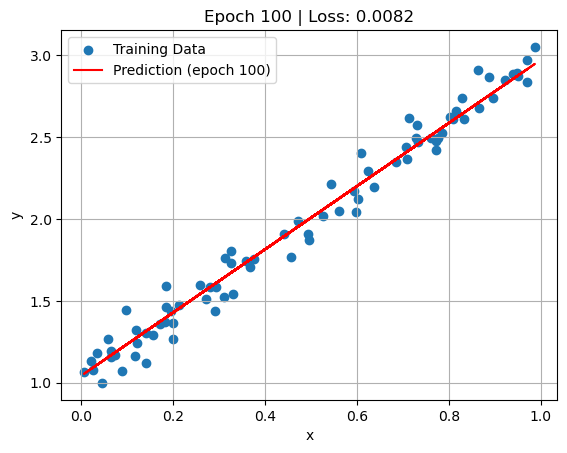

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

epochs = 100
for epoch in range(epochs):
    
    yhat = b + w * xtrain
    error = (yhat - ytrain)
    loss = (error ** 2).mean()
    bgrad = 2 * error.mean()
    wgrad = 2 * (xtrain * error).mean()
    b = b - lr * bgrad
    w = w - lr * wgrad 

    clear_output(wait=True)
    plt.clf()  # clear current figure
    plt.scatter(xtrain, ytrain, label='Training Data')
    plt.plot(xtrain, yhat, color='red', label=f'Prediction (epoch {epoch+1})')
    plt.title(f'Epoch {epoch+1} | Loss: {loss:.4f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.pause(0.1)

plt.ioff()  # t

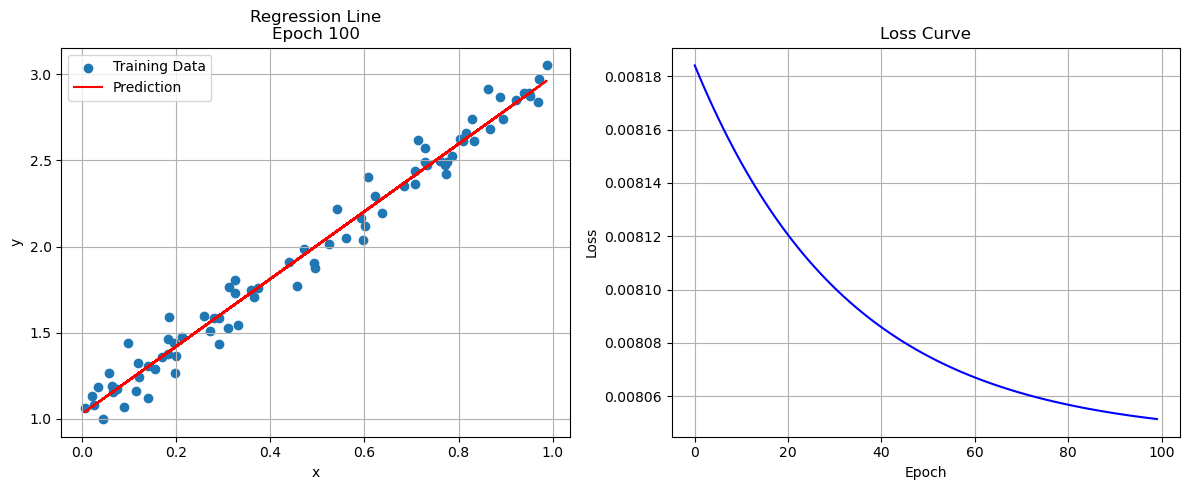

In [128]:

# For loss curve
loss_history = []

# Enable interactive plotting
plt.ion()

for epoch in range(epochs):
    # Prediction
    yhat = b + w * xtrain

    # Error and loss
    error = yhat - ytrain
    loss = (error ** 2).mean()
    loss_history.append(loss)

    # Gradients
    bgrad = 2 * error.mean()
    wgrad = 2 * (xtrain * error).mean()

    # Update weights
    b -= lr * bgrad
    w -= lr * wgrad

    # Plotting
    clear_output(wait=True)
    plt.figure(figsize=(12, 5))  # Wider figure for side-by-side

    # --- Left: Regression Line ---
    plt.subplot(1, 2, 1)
    plt.scatter(xtrain, ytrain, label='Training Data')
    plt.plot(xtrain, yhat, color='red', label=f'Prediction')
    plt.title(f'Regression Line\nEpoch {epoch+1}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    # --- Right: Loss Curve ---
    plt.subplot(1, 2, 2)
    plt.plot(loss_history, color='blue')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.tight_layout()
    plt.pause(0.1)

plt.ioff()
plt.show()

## Basics Guys

In [129]:
import torch 
scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.randn((2, 3, 4), dtype=torch.float)
print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(3.1416)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[ 0.6784, -1.2345, -0.0431, -1.6047],
         [ 1.7878, -0.4780, -0.2429, -0.9342],
         [-1.1109,  0.0915, -2.3169, -0.2168]],

        [[-1.3847, -0.8712, -0.2234,  1.7174],
         [-0.5920, -0.0631, -0.8286,  0.3309],
         [-1.5576,  0.9956, -0.8798, -0.6011]]])


In [130]:
# Caution 

same_matrix = matrix.view(1,6)
print(same_matrix)
# this is just a view of the same matrix the matrix didn't change it's shape additionally the we must be
# carefull about the references

tensor([[1., 1., 1., 1., 1., 1.]])


In [131]:
new_matrix = matrix.new_tensor(matrix.view(1,6)) ## or we can use matrix.clone()

/tmp/ipykernel_12623/2122787455.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  new_matrix = matrix.new_tensor(matrix.view(1,6)) ## or we can use matrix.clone()


In [132]:
another_matrix = matrix.view(1, 6).clone().detach()

In [133]:
# we do not have cuda but if we had 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
  print(torch.cuda.get_device_name(i))

NVIDIA GeForce RTX 4070


## Can we do better ?? Yes we can We can use auto-grad

In [134]:
import torch
torch.manual_seed(42)

In [135]:
b = torch.randn(1, requires_grad=True, dtype=torch.float)
w = torch.randn(1, requires_grad=True, dtype=torch.float)
print(b , w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [136]:
# to send to gpu we can use torch.randn(1, requires_grad=True, dtype=torch.float).to(device)

lets use autograd

In [138]:
import torch
import matplotlib.pyplot as plt

# Set seed for reproducibility
torch.manual_seed(42)
true_w = torch.tensor(2)
true_b = torch.tensor(3)

# Create synthetic data: y = 3x + 7 + noise
x_train = torch.linspace(0, 10, 50)
y_train = true_w * x_train + true_b + torch.randn(50) * 2  # Add some noise


# Initialize weights and bias as scalars with gradients
w = torch.randn((), requires_grad=True)
b = torch.randn((), requires_grad=True)

# Set learning rate
lr = 0.01
epochs = 100

loss_history = []

for epoch in range(epochs):
    # Forward pass
    yhat = w * x_train + b
    loss = ((yhat - y_train) ** 2).mean()
    loss_history.append(loss.item())

    # Backward pass
    loss.backward()

    # Manual gradient descent update
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    # Zero gradients for next step
    w.grad.zero_()
    b.grad.zero_()

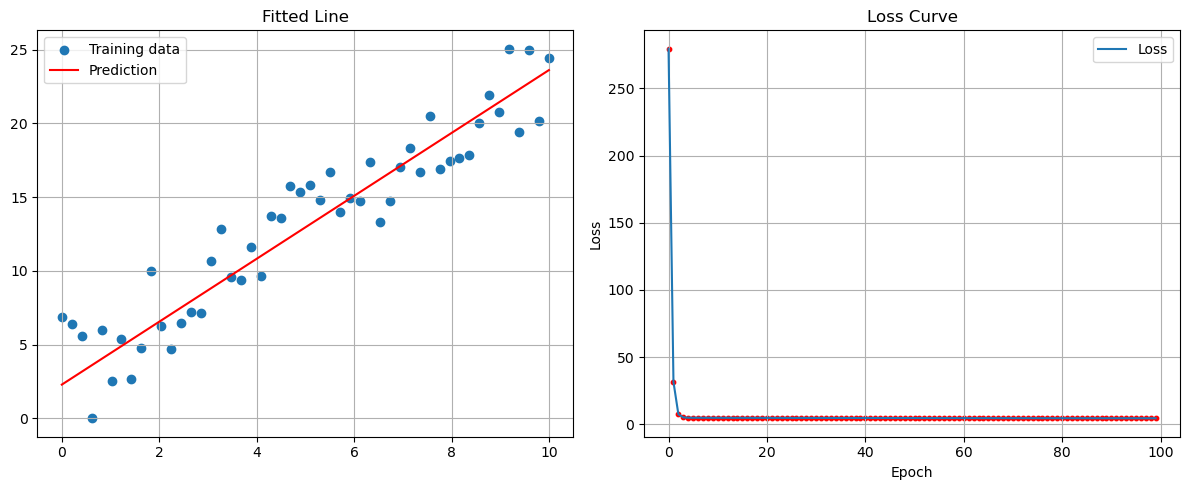

In [139]:
# Final predictions
y_pred = w.detach() * x_train + b.detach()

# Plot regression result
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_pred, color='red', label='Prediction')
plt.title('Fitted Line')
plt.legend()
plt.grid(True)

# Plot loss curve
plt.subplot(1, 2, 2)
plt.plot(loss_history, label='Loss')
plt.scatter(range(epochs), loss_history, s=10, color='red')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


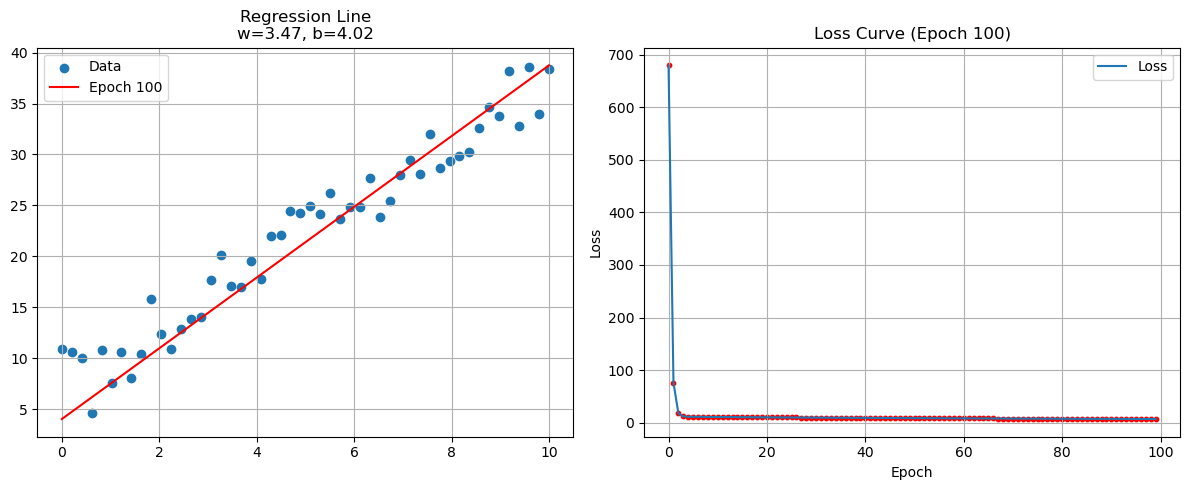

In [140]:
import torch
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Set seed
torch.manual_seed(42)

# Create data: y = 3x + 7 + noise
x_train = torch.linspace(0, 10, 50)
y_train = 3 * x_train + 7 + torch.randn(50) * 2

# Initialize parameters (scalars)
w = torch.randn((), requires_grad=True)
b = torch.randn((), requires_grad=True)

# Hyperparams
lr = 0.01
epochs = 100
loss_history = []

# Interactive mode
plt.ion()

for epoch in range(epochs):
    # --- Forward pass ---
    yhat = w * x_train + b
    loss = ((yhat - y_train) ** 2).mean()
    loss_history.append(loss.item())

    # --- Backward pass ---
    loss.backward()

    # --- Gradient descent ---
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    # --- Reset gradients ---
    w.grad.zero_()
    b.grad.zero_()

    # --- Live plotting ---
    clear_output(wait=True)
    plt.figure(figsize=(12, 5))

    # Left: Regression fit
    plt.subplot(1, 2, 1)
    plt.scatter(x_train, y_train, label='Data')
    with torch.no_grad():
        y_pred = w * x_train + b
    plt.plot(x_train, y_pred, color='red', label=f'Epoch {epoch+1}')
    plt.title(f'Regression Line\nw={w.item():.2f}, b={b.item():.2f}')
    plt.legend()
    plt.grid(True)

    # Right: Loss curve
    plt.subplot(1, 2, 2)
    plt.plot(loss_history, label='Loss')
    plt.scatter(range(len(loss_history)), loss_history, s=10, color='red')
    plt.title(f'Loss Curve (Epoch {epoch+1})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.pause(0.1)  # pause to update

plt.ioff()
plt.show()


In [ ]:
%pip install torchviz

In [ ]:
import torch
import matplotlib.pyplot as plt
from torchviz import make_dot

# Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 0 - Create data
torch.manual_seed(42)
x_train = torch.linspace(0, 10, 50).to(device)
y_train = 3 * x_train + 7 + torch.randn(50).to(device) * 2  # y = 3x + 7 + noise

# Step 1 - Initialize parameters (scalars with grad)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Step 2 - Forward pass: compute prediction
yhat = b + w * x_train

# Step 3 - Compute loss (MSE)
error = yhat - y_train
loss = (error ** 2).mean()

# Step 4 - Visualize computation graph
make_dot(loss, params={'w': w, 'b': b})


# we can do better 

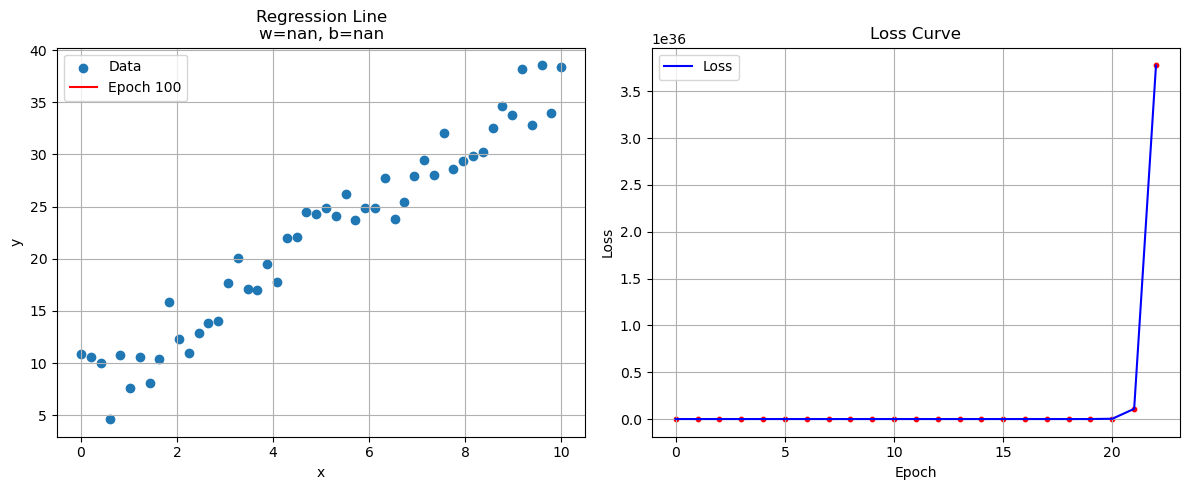

In [141]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 0: Create synthetic training data
torch.manual_seed(42)
x_train_tensor = torch.linspace(0, 10, 50).to(device)
y_train_tensor = 3 * x_train_tensor + 7 + torch.randn(50).to(device) * 2

# Step 1: Initialize parameters with requires_grad
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Step 2: Define optimizer
lr = 0.1
optimizer = optim.SGD([b, w], lr=lr)

# Step 3: Training loop with live plotting
n_epochs = 100
loss_history = []

plt.ion()

for epoch in range(n_epochs):
    # --- Forward pass ---
    yhat = b + w * x_train_tensor

    # --- Loss computation (MSE) ---
    error = yhat - y_train_tensor
    loss = (error ** 2).mean()
    loss_history.append(loss.item())

    # --- Backward + Optimization step ---
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # --- Plotting ---
    clear_output(wait=True)
    plt.figure(figsize=(12, 5))

    # Left: Regression line
    plt.subplot(1, 2, 1)
    plt.scatter(x_train_tensor.cpu(), y_train_tensor.cpu(), label="Data")
    plt.plot(x_train_tensor.cpu(), yhat.detach().cpu(), color='red', label=f"Epoch {epoch+1}")
    plt.title(f"Regression Line\nw={w.item():.2f}, b={b.item():.2f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()

    # Right: Loss curve
    plt.subplot(1, 2, 2)
    plt.plot(loss_history, label="Loss", color='blue')
    plt.scatter(range(len(loss_history)), loss_history, s=10, color='red')
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.pause(0.1)

plt.ioff()
plt.show()
